# Elementy statystyki

**Zadanie 1**
Kupiłeś szpulę filamentu o średnicy $1.75$ mm do swojej drukarki 3D. Chcesz zmierzyć, ją bliska jest średnica filamentu deklarowanej wartości. Za pomocą suwmiarki wykonujesz pięć pomiarów w różnych punktach na szpuli: $1.78, 1.75, 1.72, 1.74, 1.77$.
Oblicz średnią i odchylenie standardowe dla tego zbioru wartość.

In [ ]:

import numpy as np

pomiary = [1.78, 1.75, 1.72, 1.74, 1.77]

srednia = np.mean(pomiary)

odchylenie_standardowe = np.std(pomiary)

print(f"Średnia z pomiarów: {srednia:.2f} mm")
print(f"Odchylenie standardowe: {odchylenie_standardowe:.3f} mm")

Średnia z pomiarów: 1.75 mm
Odchylenie standardowe: 0.021 mm





**Zadanie 2**
Masz wątpliwości, czy mój filament do drukarki 3D rzeczywiście ma deklarowane $1.75$ mm średnicy. Za pomocą suwmiarki wykonałeś $34$ pomiary. Średnia próby wynosi $1.715588$, a standardowe odchylenie próby - $0.029252$. Jaki jest $99$-procentowy przedział ufności dla średniej średnicy filamentu na całej szpuli?

In [ ]:

import numpy as np
from scipy.stats import t

n = 34
srednia_proby = 1.715588
odchylenie_standardowe_proby = 0.029252
poziom_ufnosci = 0.99

stopnie_swobody = n - 1

wartosc_krytyczna = t.ppf((1 + poziom_ufnosci) / 2, stopnie_swobody)

margines_bledu = wartosc_krytyczna * (odchylenie_standardowe_proby / np.sqrt(n))

dolna_granica = srednia_proby - margines_bledu
gorna_granica = srednia_proby + margines_bledu

print(f"99-procentowy przedział ufności dla średniej średnicy filamentu:")
print(f"[{dolna_granica:.4f}, {gorna_granica:.4f}] mm")

99-procentowy przedział ufności dla średniej średnicy filamentu:
[1.7019, 1.7293] mm


**Zadanie 3:**
Producent twierdzi, że średni czas użytkowania smartfona Z-Phone przez konsumentów wynosi $42$ miesiące z odchyleniem standardowym równym $8$ miesiącom. Jeśli założymy rozkład normalny, jakie będzie prawdopodobieństwo, że losowo wybrany Z-Phone wytrzyma od $20$ do $30$ miesięcy?


In [ ]:

import numpy as np
from scipy.stats import norm

srednia = 42
odchylenie_standardowe = 8

z_score_20 = (20 - srednia) / odchylenie_standardowe

z_score_30 = (30 - srednia) / odchylenie_standardowe

prawdopodobienstwo = norm.cdf(z_score_30) - norm.cdf(z_score_20)

print(f"Prawdopodobieństwo, że Z-Phone wytrzyma od 20 do 30 miesięcy wynosi: {prawdopodobienstwo:.4f}")

Prawdopodobieństwo, że Z-Phone wytrzyma od 20 do 30 miesięcy wynosi: 0.0638


**Zadanie 4:**
Bazując na danych o pasażerach rejsu statkiem Titanic, dane dostępne pod linkiem *https://raw.githubusercontent.com/PatrykMazurek/IiAD/refs/heads/main/LAB_7/titanic.csv*. Przedstaw następujące dane:

1. Przedstaw na wykresie jak rozkłada się wiek pasażerów w zależności od klasy w której podróżowali.
2. Oblicz i przedstaw na wykresie liczbę pasażerów na danym pokładzie. wyznacz dane na podstawie kolumny `deck`.
3. przedstaw na wykresie dane dotyczące ewakuacji pasażerów, z których klas ewakuowano najwięcej pasażerów?
4. Przedstaw jaką zależność na ewakuacje miał wiek pasażerów. Zaprezentuj na wykresie dane o pasażerach, którzy ocaleli i tych, którzy nie ocaleli.
5. Sprawdź, czy rozkład wieku pasażerów jest symetryczny, przedstaw dane dla każdej klasy osobno.
6. Wskaż czy zachodzą korelacje między wiekiem `age` a przeżyciem `survived` oraz między klasą, którą poluzowali pasażerowie `pclass` a przeżyciem `survived`.

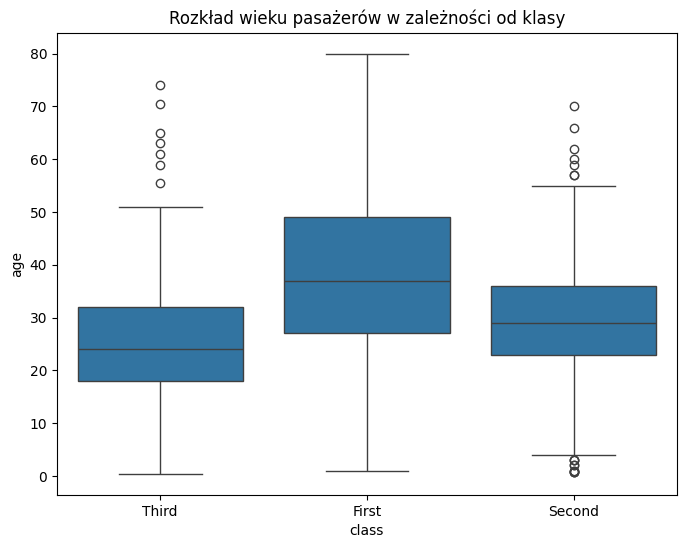

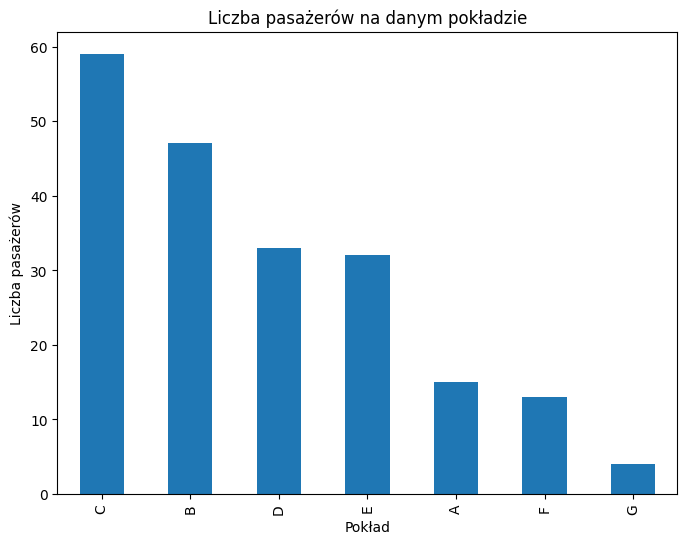

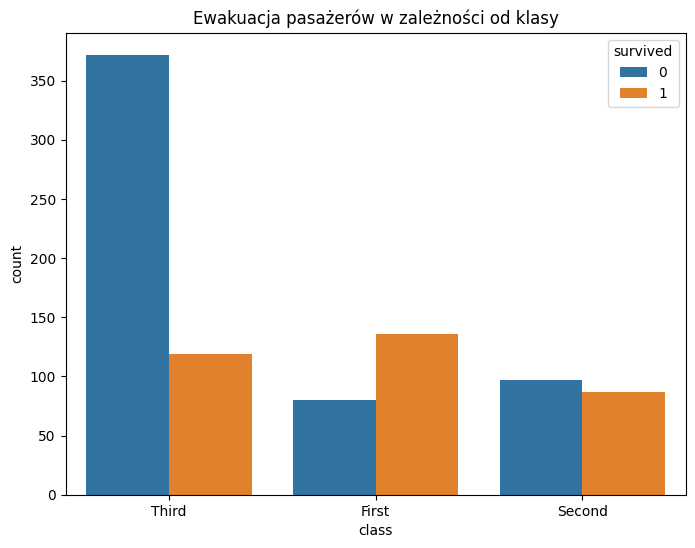

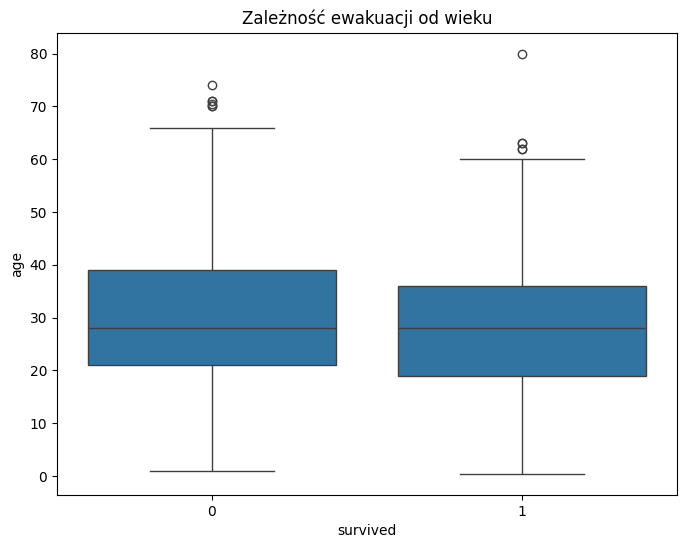

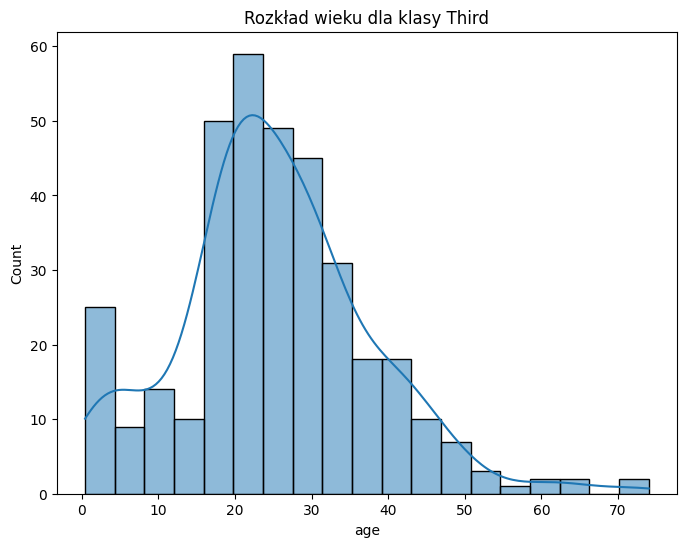

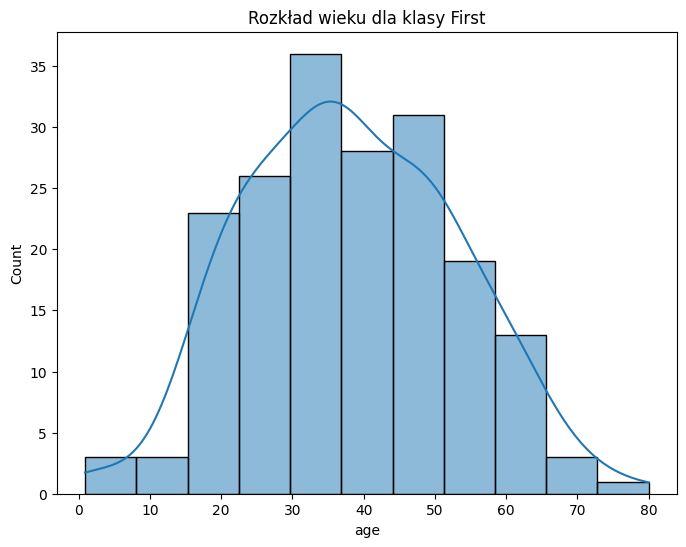

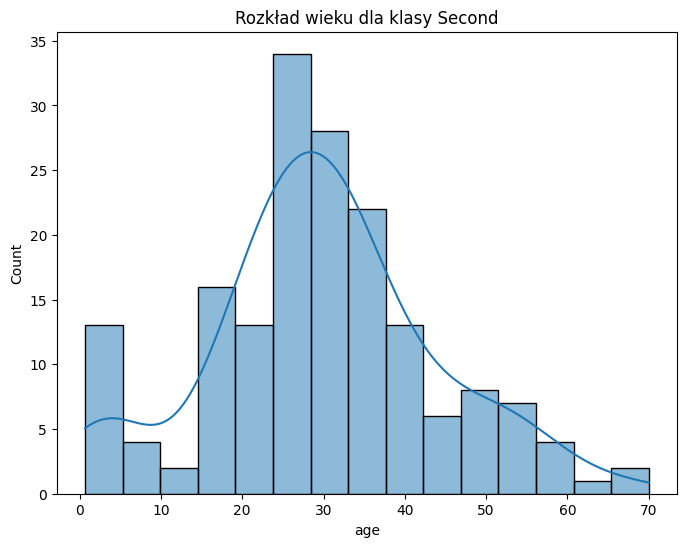

Korelacja między wiekiem a przeżyciem: -0.08
Korelacja między klasą a przeżyciem: -0.34


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/PatrykMazurek/IiAD/refs/heads/main/LAB_7/titanic.csv"
df = pd.read_csv(url)

plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y="age", data=df)
plt.title("Rozkład wieku pasażerów w zależności od klasy")
plt.show()

deck_counts = df["deck"].value_counts()
plt.figure(figsize=(8, 6))
deck_counts.plot(kind="bar")
plt.title("Liczba pasażerów na danym pokładzie")
plt.xlabel("Pokład")
plt.ylabel("Liczba pasażerów")
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x="class", hue="survived", data=df)
plt.title("Ewakuacja pasażerów w zależności od klasy")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="survived", y="age", data=df)
plt.title("Zależność ewakuacji od wieku")
plt.show()


for class_name in df["class"].unique():
  plt.figure(figsize=(8, 6))
  sns.histplot(df[df["class"] == class_name]["age"], kde=True)
  plt.title(f"Rozkład wieku dla klasy {class_name}")
  plt.show()


correlation_age_survived = df["age"].corr(df["survived"])
correlation_class_survived = df["pclass"].corr(df["survived"])
print(f"Korelacja między wiekiem a przeżyciem: {correlation_age_survived:.2f}")
print(f"Korelacja między klasą a przeżyciem: {correlation_class_survived:.2f}")

**Zadanie 5**
Dostępne są dane dotyczące sprzedarzy produktów w 2023 roku dane dostępne pod adresem *https://raw.githubusercontent.com/PatrykMazurek/IiAD/refs/heads/main/LAB_7/retail_sales_dataset.csv*.

Proszę zapoznaćsię z danymi i przygotować następujące informację:
1. Przedstaw na wykresie sumę wszystkich sprzedanych produktów w danym miesiącu z danej kategorii.
2. Oblicz dominatę cenową dla każdej kategorii.
3. Oblicz odchylenie standardowe cen produktów dla każdego miesiąca z podziałem na kategorie i wskarz w, których miesiącach było największe odchylenie standardowe dla każdej kategorii. wyniki przedstaw na wykresie.
4. Oblicz dla każdego miesiąca średnią oraz medianę cen  produktów w każdej kategorii. dane przedstaw na wkresie.
5. Oblicz kurtozę oraz skośnosć dla cen produktów dla każdej kategorii.
6. Zakładają przedziały wiekowe: $[18,27]$, $[28,37]$, $[38,47]$, $[48,57]$, $[58,67]$, oblicz zależności między wiekiem `Age` a wydawaną kwotą na produkty w danej kategorii. Dane oblicz dla wszystkich kategorii.ategorii.

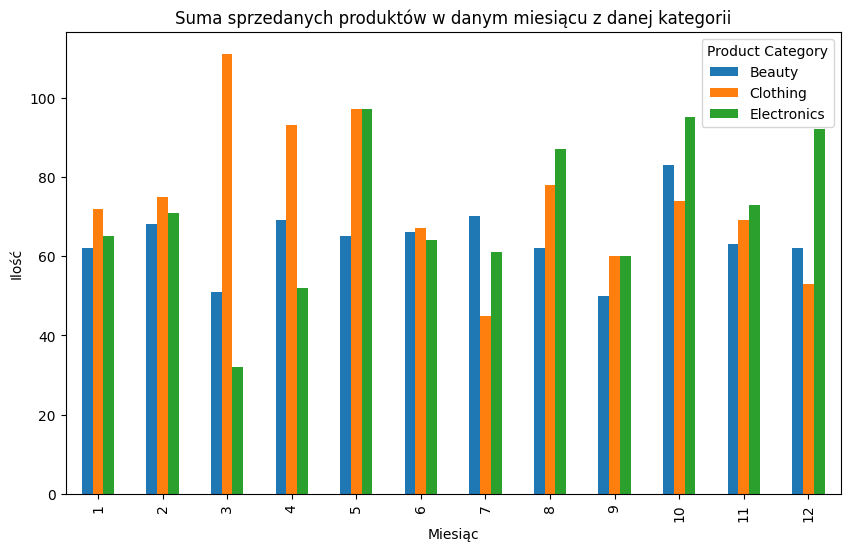

Dominanta cenowa dla każdej kategorii:
 Product Category
Beauty         None
Clothing       None
Electronics    None
Name: Price per Unit, dtype: object


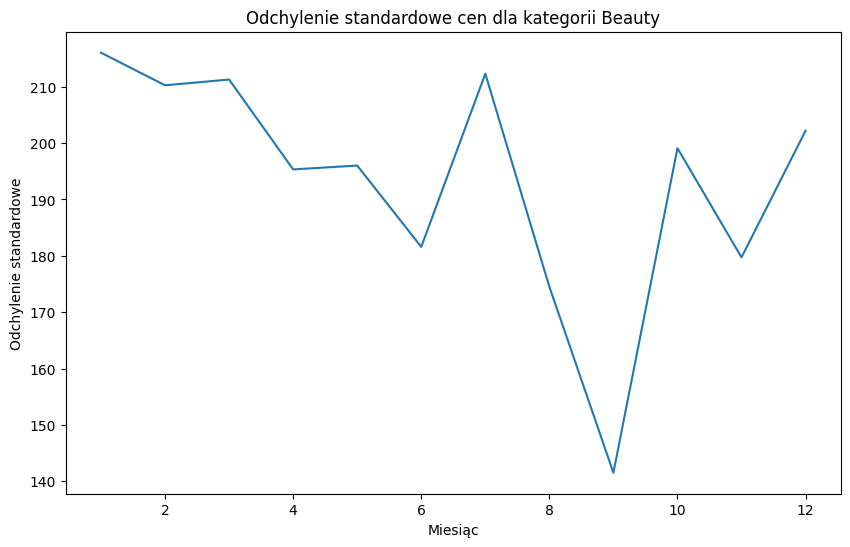

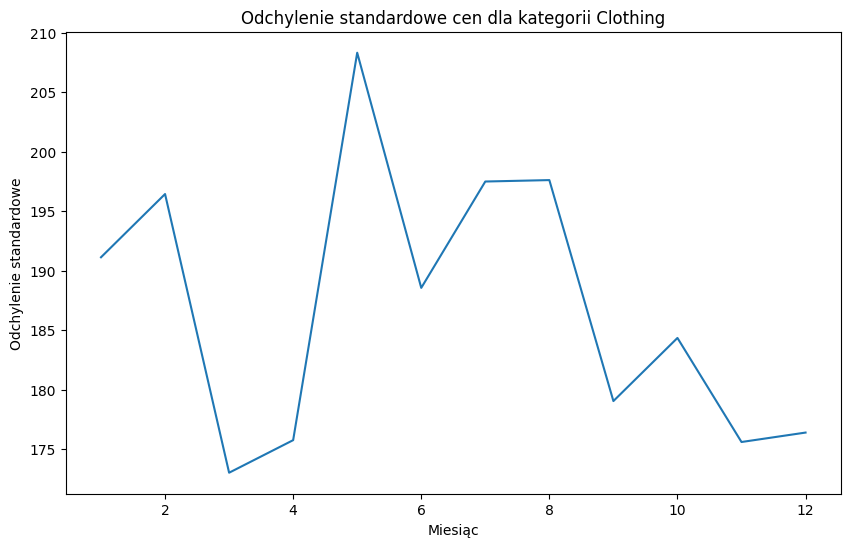

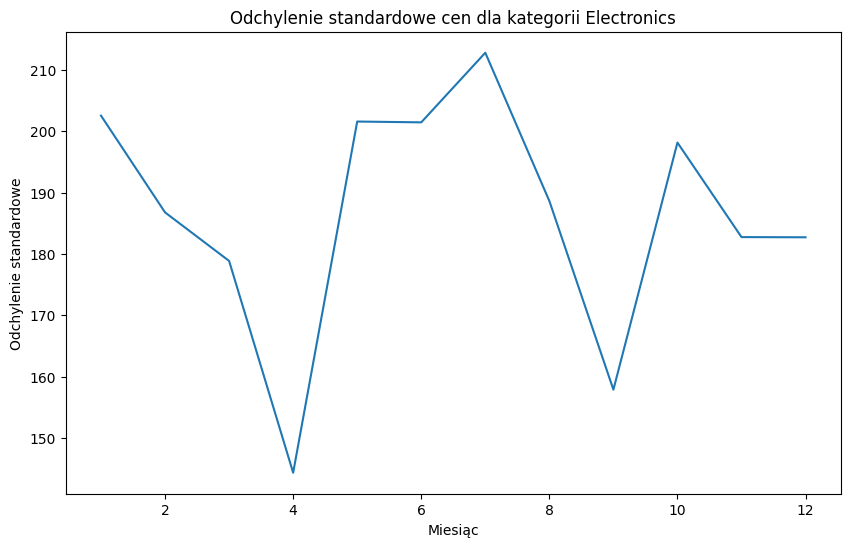

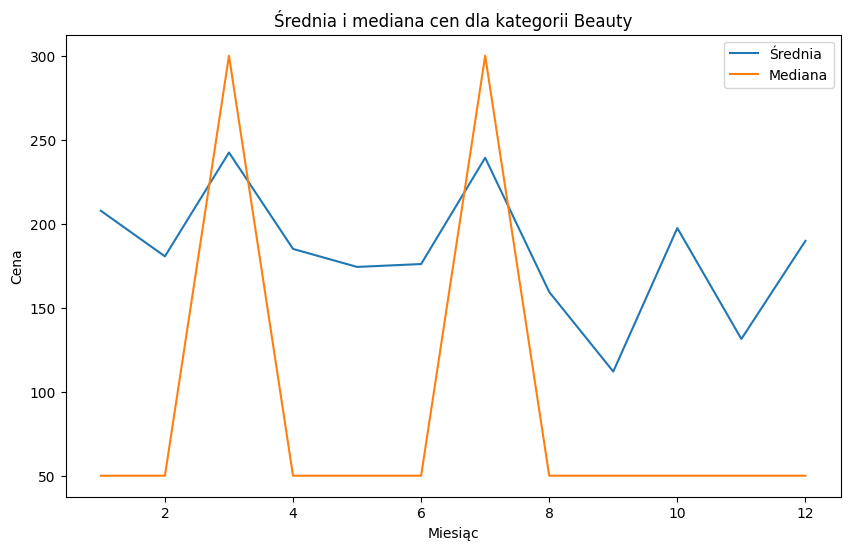

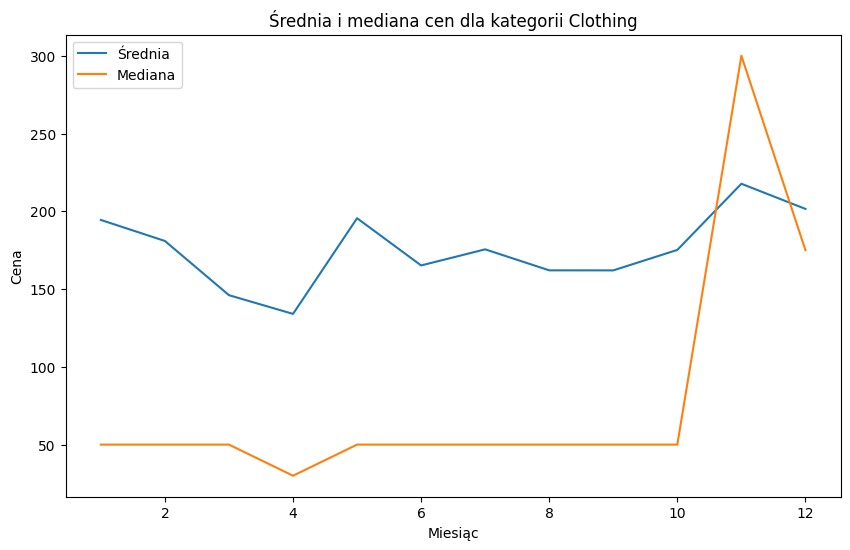

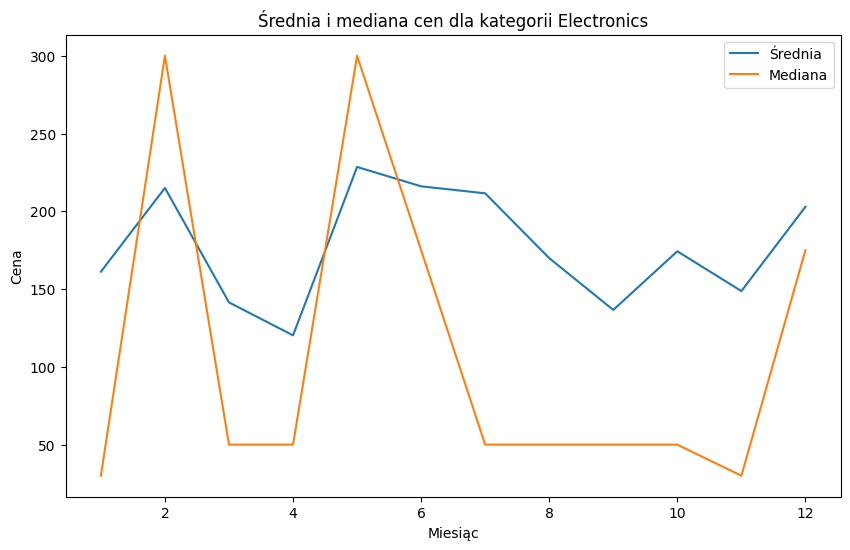

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

url = "https://raw.githubusercontent.com/PatrykMazurek/IiAD/refs/heads/main/LAB_7/retail_sales_dataset.csv"
df = pd.read_csv(url)

# 1. S
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby(['Month', 'Product Category'])['Quantity'].sum().unstack()
monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Suma sprzedanych produktów w danym miesiącu z danej kategorii')
plt.xlabel('Miesiąc')
plt.ylabel('Ilość')
plt.show()

# 2.
def calculate_mode(series):
    try:
        return mode(series)[0][0]
    except IndexError:
        return None

category_mode = df.groupby('Product Category')['Price per Unit'].agg(calculate_mode)
print("Dominanta cenowa dla każdej kategorii:\n", category_mode)


# 3.
monthly_std = df.groupby(['Month', 'Product Category'])['Price per Unit'].std().unstack()
for category in df['Product Category'].unique():
  plt.figure(figsize=(10, 6))
  plt.plot(monthly_std[category])
  plt.title(f'Odchylenie standardowe cen dla kategorii {category}')
  plt.xlabel('Miesiąc')
  plt.ylabel('Odchylenie standardowe')
  plt.show()


# 4.
monthly_mean = df.groupby(['Month', 'Product Category'])['Price per Unit'].mean().unstack()
monthly_median = df.groupby(['Month', 'Product Category'])['Price per Unit'].median().unstack()
for category in df['Product Category'].unique():
  plt.figure(figsize=(10, 6))
  plt.plot(monthly_mean[category], label='Średnia')
  plt.plot(monthly_median[category], label='Mediana')
  plt.title(f'Średnia i mediana cen dla kategorii {category}')
  plt.xlabel('Miesiąc')
  plt.ylabel('Cena')
  plt.legend()
  plt.show()




In [29]:

# 5.
category_kurtosis = df.groupby('Product Category')['Price per Unit'].apply(lambda x: x.kurtosis())
category_skewness = df.groupby('Product Category')['Price per Unit'].apply(lambda x: x.skew())

print("Kurtoza dla cen produktów dla każdej kategorii:\n", category_kurtosis)
print("Skośność dla cen produktów dla każdej kategorii:\n", category_skewness)


# 6.
bins = [18, 27, 37, 47, 57, 67]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

for category in df['Product Category'].unique():
    category_df = df[df['Product Category'] == category]
    correlation = category_df.groupby('Age Group')['Price per Unit'].sum().corr(category_df.groupby('Age Group')['Age'].mean())
    print(f"Korelacja między wiekiem a wydatkami dla kategorii {category}: {correlation:.2f}")

Kurtoza dla cen produktów dla każdej kategorii:
 Product Category
Beauty        -1.227700
Clothing      -1.031399
Electronics   -1.163051
Name: Price per Unit, dtype: float64
Skośność dla cen produktów dla każdej kategorii:
 Product Category
Beauty         0.713909
Clothing       0.788280
Electronics    0.707881
Name: Price per Unit, dtype: float64
Korelacja między wiekiem a wydatkami dla kategorii Beauty: -0.81
Korelacja między wiekiem a wydatkami dla kategorii Clothing: -0.47
Korelacja między wiekiem a wydatkami dla kategorii Electronics: -0.05


<ipython-input-29-96f65ae0f189>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = category_df.groupby('Age Group')['Price per Unit'].sum().corr(category_df.groupby('Age Group')['Age'].mean())


**Zadanie 6**
Utwórz ramkę danych `hr` na podstawie pliku *HR.csv*. Poszczególne kolumny oznaczają:
* `satisfaction_level` - poziom satysfakcji pracownika w skali od $0$ do $1$;
* `last_evaluation` - ocena pracownika w skali od $0$ do $1$;
* `number_project` - liczba projektów w które zaangażowany był dany pracownik;
* `average_montly_hours` - średnia liczab godzin w miesiącu spędzona w biurze;
* `time_spend_company` - liczba lat  spędzonych w firmie;
* `work_accident` - informacja czy pracownik miał wypadek przy pracy (`1` - tak, `0` - nie);
* `left` - informacja czy pracownik się zwolnił (`1` - tak, `0` - nie);
* `promotion_last_5years` - informacja czy pracownik otrzymał awans w ciągu ostatnich  pięciu lat (`1` - tak, `0` - nie);
* `sales` - dział zatrudnienia;
* `salary` - wysokość zarobków (grupy);

Wtykonaj następujące polecenia:
1. Zmień nazwę kolumny `sales` na `department` w ramce `hr`.
2. Jaka jest minimalna i maksymalna ocena poziomu satysfakcji pracownika?
3. Jaka jest średnia ocena pracownika, a jaka mediana?
4. Ile jest działów w firmie?
5. Ile jest/było pracowników w poszczególnych działach? Sporządź odpowiedni wykres słupkowy.
6. Ilu pracowników się zwolniło? Ile procent pracowników zwolniło się z danego działu?
7. Ilu pracowników dostało awans? Ile procent pracowników dostało awans z danego działu?
8. Ile jest grup płacowych. Sporządź wykres słupkowy prezentujący liczbę pracowników z każdej grupy płacowej w każdym dziale.
9. Wyznacz macierz korelacji dla kolumn ramki `hr` z uwzględnieniem zarobków (w tym celu dokonaj odpowiedniej konwersji danych kategorycznych na dane numeryczne). Utwórz odpowiednia mapę ciepła. Zrób to samo ale osobno dla pracowników, którzy się zwolnili oraz tych którzy zostali.
10. Zbadaj, czy istnieje związek między poziomem satysfakcji a tym, czy pracownik opuścił firmę. Wykonaj to na trzy sposby:
    - zbadaj korelację między poziomem satysfakcji a decyzją o odejściu;
    - wykonaj wizulaizację zależność między poziomem satysfakcji a tym, czy pracownik opuścił firmę, za pomocą wykresu pudełkowego;
    - za pomocą testu t-studenta ocenić, czy istnieją statystycznie istotne różnice w poziomie satysfakcji między pracownikami, którzy się zwolnili a tymi, którzy zostali.
11. Czy wynagrodzenie wpływa na rotację pracowników? Sprawdź to na trzy sposoby:
    - za pomocą wizulaizacji rozkładu wynagrodzenia w zależności od rotacji (wykres słupkowy);
    - za pomocą obliczania procentu pracowników, którzy odeszli w różnych grupach płacowych;
    - za pomocą testy chi-kwadrat.
12. Zbadaj, czy pracownicy, którzy otrzymali awans, mają wyższy poziom satysfakcji po otrzymaniu awansu. Sprawdź to na dwa sposoby:
    - za pomocą wykresu pudełkowego poziomu satysfakcji w zależności od tego, czy pracownik otrzymał awans;
    - za pomocą test t-studenta - porównanie poziomu satysfakcji między pracownikami, którzy otrzymali awans a tymi, którzy nie otrzymali.
13. Przedstaw na wykresie słupkowym liczbę pracowników, którzy się zwolnili i nie w zależności od liczby projektów.
14. Dokonaj kategoryzacji oceny poziomu satysfakcji na 6 przedziałów: $[0, 0.2, 0.4, 0.6, 0.8, 0. 9, 1.0]$ nazwanych odpowiednio: 'Lowest', 'Low', 'Average', 'Good', 'High' 'Highest'. Przedstaw na wykresie słupkowym liczbę pracowników, którzy się zwolnili i nie w zależności od skategoryzowanej oceny poziomu satysfakcji.

In [ ]:

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['HR.csv']))


# 1. Zmień nazwę kolumny `sales` na `department` w ramce `hr`.
df = df.rename(columns={'sales': 'department'})




Saving HR.csv to HR.csv


Minimalna ocena satysfakcji: 0.09
Maksymalna ocena satysfakcji: 1.0
Średnia ocena pracownika: 0.72
Mediana oceny pracownika: 0.72
Liczba działów w firmie: 10


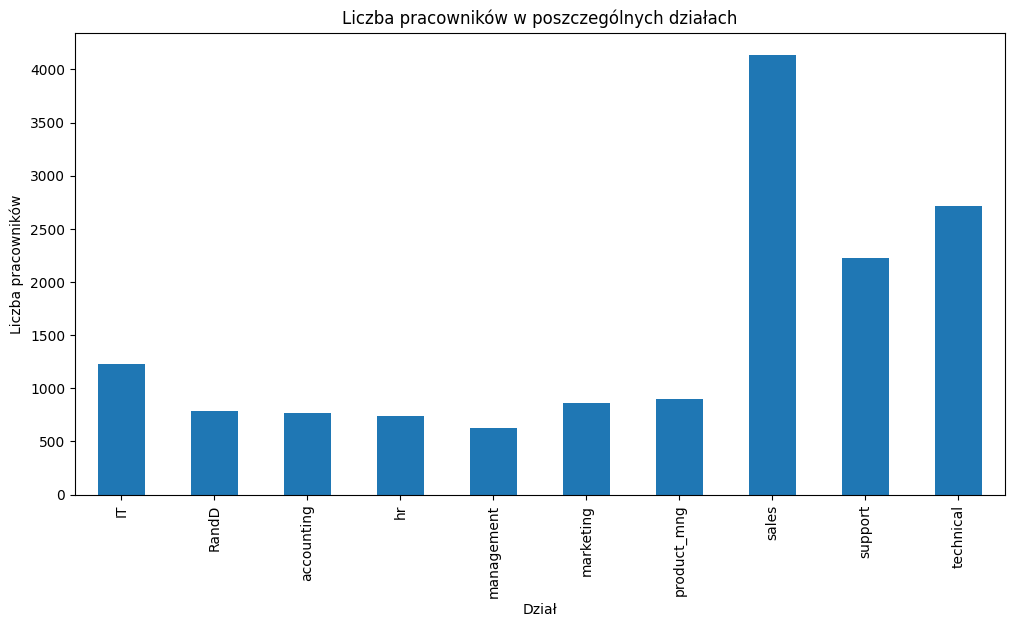

Liczba pracowników, którzy się zwolnili: 3571
Procent pracowników, którzy się zwolnili z danego działu:
 department
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
dtype: float64
Liczba pracowników, którzy otrzymali awans: 319
Procent pracowników, którzy otrzymali awans z danego działu:
 department
IT              0.244499
RandD           3.430750
accounting      1.825293
hr              2.029770
management     10.952381
marketing       5.011655
product_mng          NaN
sales           2.415459
support         0.897263
technical       1.029412
dtype: float64
Liczba grup płacowych: 3


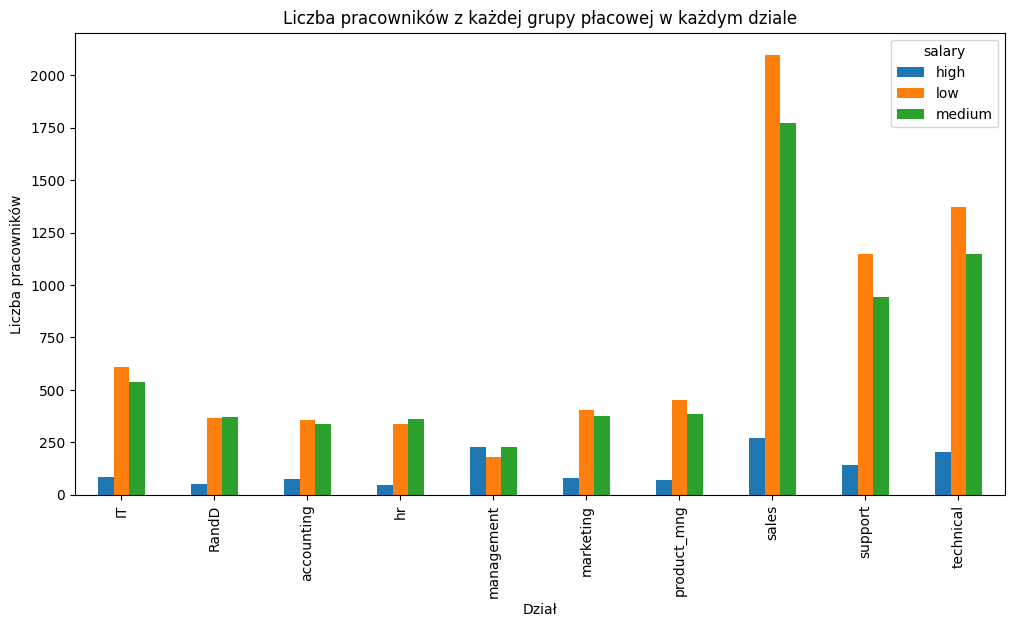

ValueError: could not convert string to float: 'Low'

In [ ]:


# 2.
min_satisfaction = df['satisfaction_level'].min()
max_satisfaction = df['satisfaction_level'].max()
print(f"Minimalna ocena satysfakcji: {min_satisfaction}")
print(f"Maksymalna ocena satysfakcji: {max_satisfaction}")

# 3.
mean_evaluation = df['last_evaluation'].mean()
median_evaluation = df['last_evaluation'].median()
print(f"Średnia ocena pracownika: {mean_evaluation:.2f}")
print(f"Mediana oceny pracownika: {median_evaluation:.2f}")

# 4.
number_of_departments = df['department'].nunique()
print(f"Liczba działów w firmie: {number_of_departments}")

# 5.
employees_per_department = df.groupby('department')['satisfaction_level'].count()
plt.figure(figsize=(12, 6))
employees_per_department.plot(kind='bar')
plt.title('Liczba pracowników w poszczególnych działach')
plt.xlabel('Dział')
plt.ylabel('Liczba pracowników')
plt.show()

# 6.
left_employees = df['left'].sum()
print(f"Liczba pracowników, którzy się zwolnili: {left_employees}")

left_employees_per_department = df[df['left'] == 1].groupby('department')['left'].count()
percentage_left_per_department = (left_employees_per_department / employees_per_department) * 100
print("Procent pracowników, którzy się zwolnili z danego działu:\n", percentage_left_per_department)

# 7.
promoted_employees = df['promotion_last_5years'].sum()
print(f"Liczba pracowników, którzy otrzymali awans: {promoted_employees}")

promoted_employees_per_department = df[df['promotion_last_5years'] == 1].groupby('department')['promotion_last_5years'].count()
percentage_promoted_per_department = (promoted_employees_per_department / employees_per_department) * 100
print("Procent pracowników, którzy otrzymali awans z danego działu:\n", percentage_promoted_per_department)

# 8.
salary_groups = df['salary'].nunique()
print(f"Liczba grup płacowych: {salary_groups}")

employees_per_salary_department = df.groupby(['department', 'salary'])['satisfaction_level'].count().unstack()
employees_per_salary_department.plot(kind='bar', figsize=(12, 6))
plt.title('Liczba pracowników z każdej grupy płacowej w każdym dziale')
plt.xlabel('Dział')
plt.ylabel('Liczba pracowników')
plt.show()


# 9.
df_numeric = df.copy()
df_numeric['salary'] = df_numeric['salary'].map({'low': 1, 'medium': 2, 'high': 3})
df_numeric['department'] = pd.factorize(df_numeric['department'])[0]

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji dla wszystkich pracowników')
plt.show()


df_left = df_numeric[df_numeric['left'] == 1]
correlation_matrix_left = df_left.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_left, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji dla pracowników, którzy się zwolnili')
plt.show()

df_stayed = df_numeric[df_numeric['left'] == 0]
correlation_matrix_stayed = df_stayed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_stayed, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji dla pracowników, którzy zostali')
plt.show()

# 10.
correlation_satisfaction_left = df['satisfaction_level'].corr(df['left'])
print(f"Korelacja między poziomem satysfakcji a decyzją o odejściu: {correlation_satisfaction_left:.2f}")

plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Zależność między poziomem satysfakcji a odejściem z firmy')
plt.show()

t_statistic, p_value = stats.ttest_ind(df[df['left'] == 1]['satisfaction_level'], df[df['left'] == 0]['satisfaction_level'])
print(f"Wynik testu t-studenta: statystyka t = {t_statistic:.2f}, wartość p = {p_value:.4f}")

# 11.

plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Rozkład wynagrodzenia w zależności od rotacji')
plt.show()

left_by_salary = df.groupby(['salary', 'left'])['satisfaction_level'].count().unstack()
percentage_left_by_salary = (left_by_salary[1] / (left_by_salary[0] + left_by_salary[1])) * 100
print("Procent pracowników, którzy odeszli w różnych grupach płacowych:\n", percentage_left_by_salary)

contingency_table = pd.crosstab(df['salary'], df['left'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(f"Wynik testu chi-kwadrat: statystyka chi2 = {chi2:.2f}, wartość p = {p_value:.4f}")



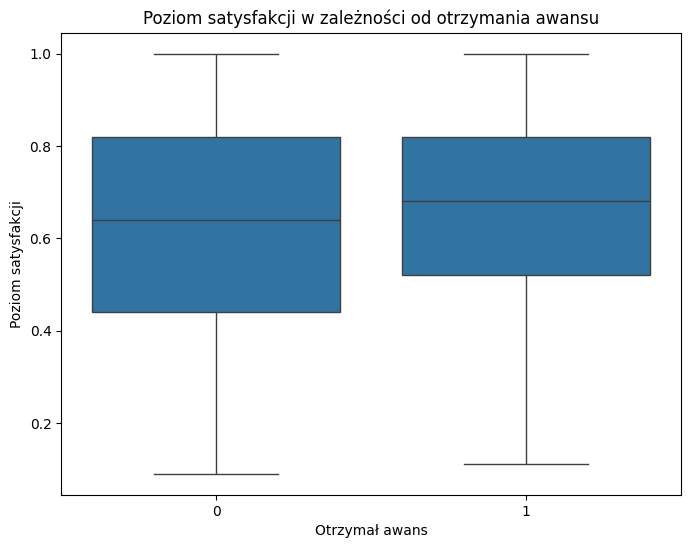

Wynik testu t-studenta: statystyka t = 3.14, wartość p = 0.0017


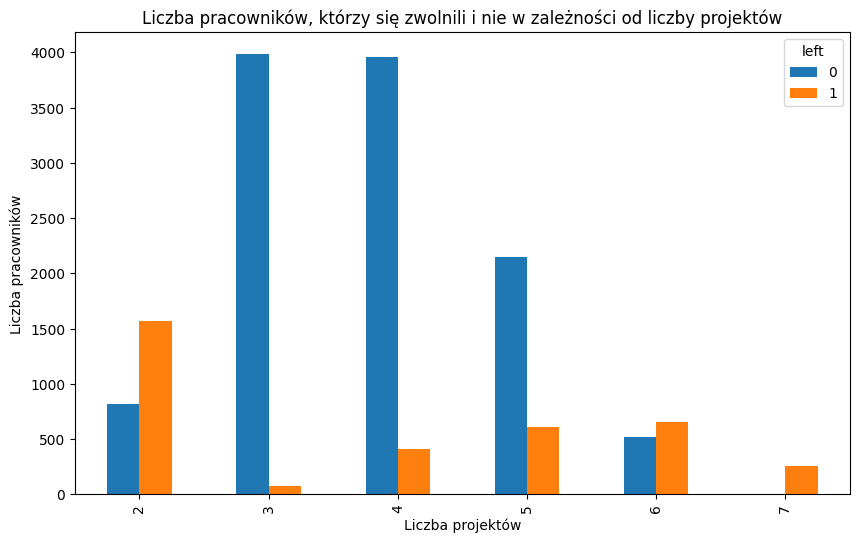

<ipython-input-23-578a93e52db0>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  left_by_satisfaction_category = df.groupby(['Satisfaction_Category', 'left'])['satisfaction_level'].count().unstack()


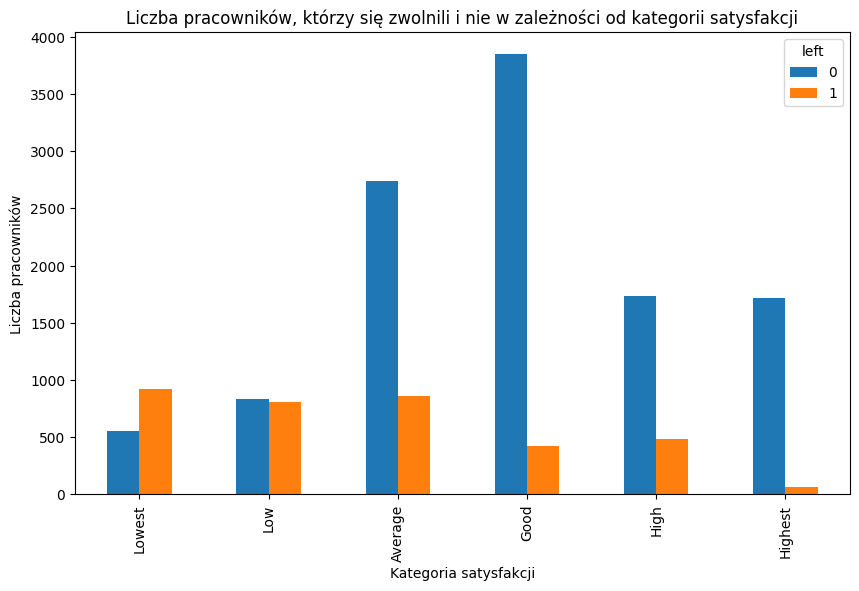

In [ ]:

# 12.

# Wykres pudełkowy
plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=df)
plt.title('Poziom satysfakcji w zależności od otrzymania awansu')
plt.xlabel('Otrzymał awans')
plt.ylabel('Poziom satysfakcji')
plt.show()

# Test t-studenta
promoted_satisfaction = df[df['promotion_last_5years'] == 1]['satisfaction_level']
not_promoted_satisfaction = df[df['promotion_last_5years'] == 0]['satisfaction_level']
t_statistic, p_value = stats.ttest_ind(promoted_satisfaction, not_promoted_satisfaction)
print(f"Wynik testu t-studenta: statystyka t = {t_statistic:.2f}, wartość p = {p_value:.4f}")


# 13.
left_by_projects = df.groupby(['number_project', 'left'])['satisfaction_level'].count().unstack()
left_by_projects.plot(kind='bar', figsize=(10, 6))
plt.title('Liczba pracowników, którzy się zwolnili i nie w zależności od liczby projektów')
plt.xlabel('Liczba projektów')
plt.ylabel('Liczba pracowników')
plt.show()


# 14.

bins = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]
labels = ['Lowest', 'Low', 'Average', 'Good', 'High', 'Highest']
df['Satisfaction_Category'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels, include_lowest=True)

left_by_satisfaction_category = df.groupby(['Satisfaction_Category', 'left'])['satisfaction_level'].count().unstack()
left_by_satisfaction_category.plot(kind='bar', figsize=(10, 6))
plt.title('Liczba pracowników, którzy się zwolnili i nie w zależności od kategorii satysfakcji')
plt.xlabel('Kategoria satysfakcji')
plt.ylabel('Liczba pracowników')
plt.show()